# Setup, imports

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/honours
%ls

/content/drive/.shortcut-targets-by-id/19ffbnjWUM9FX-8Hcysq3IAN9wHHnO781/honours
all/    feature_extraction.py     model_creation.py  plot_functions.py  __pycache__/  sheets/
dried/  hyperparameter_tuning.py  nonsaturated/      prep_functions.py  saturated/


In [3]:
from prep_functions import create_images_list, extract_gh_values,extract_lp_values, circle_cut_out, scale_fit_transform
from plot_functions import plot_metrics,lin_regression,plot_predictions,plot_all_validation
from model_creation import build_densenet, build_inception

In [4]:
import pandas as pd
import cv2
import numpy as np


from google.colab.patches import cv2_imshow #colab bug with imshow

from sklearn.model_selection import KFold

from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Data preparation

In [5]:
#loading two datasets into respective dataframes
gh_df = pd.read_csv('/content/drive/MyDrive/honours/sheets/GrievesHouse.csv')
lp_df = pd.read_csv('/content/drive/MyDrive/honours/sheets/LowerPilmore.csv')

gh_df.head()

,Sample,Stable aggregates (%)
0,1,65.88
1,2,23.90
2,2,31.86
3,3,89.14
4,4,68.71


In [6]:
# creating lists of images(scaled down) and respective label
gh_path = "/content/drive/MyDrive/honours/all/GrievesHouse/*.*"
lp_path = "/content/drive/MyDrive/honours/all/LowerPilmore/*.*"

gh_colour,gh_labels = create_images_list(gh_path,(256,256))
lp_colour,lp_labels = create_images_list(lp_path,(256,256))


In [7]:
gh_values = extract_gh_values(gh_labels,gh_df)
lp_values = extract_lp_values(lp_labels,lp_df)

#Data normalisation

In [8]:
gh_colour = [circle_cut_out(i) for i in gh_colour]
lp_colour = [circle_cut_out(i) for i in lp_colour]

# gh_colour = [img / 255 for img in gh_colour]
# lp_colour = [img / 255 for img in lp_colour]

X_col = gh_colour + lp_colour
y = gh_values + lp_values

y = np.array(y).reshape(-1, 1)

X_col = np.reshape(X_col,(len(X_col),256,256,3))


# Inception

In [10]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)

------------------------------------------------------------------
------------------------------Fold 0------------------------------
------------------------------------------------------------------
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/20
7/7 [==============================] - 19s 1s/step - loss: 17.0228 - mean_absolute_error: 3.3728 - root_mean_squared_error: 4.1259 - val_loss: 0.8960 - val_mean_absolute_error: 0.7988 - val_root_mean_squared_error: 0.9466
Epoch 2/20
7/7 [==============================] - 1s 102ms/step - loss: 2.6726 - mean_absolute_error: 1.3116 - root_mean_squared_error: 1.6348 - val_loss: 0.8435 - val_mean_absolute_error: 0.7710 - val_root_mean_squared_error: 0.9184
Epoch 3/20
7/7 [==============================] - 1s 109ms/step - loss: 1.5082 - mean_absolute_error: 1.0136 - root_mean_squared_error: 1.2281 - val_loss: 1.3635 - val_mean_absolute_error: 0.9341 - val_root_mean_squared_error: 1.1677
Epoch 4/20
7/7 [=================

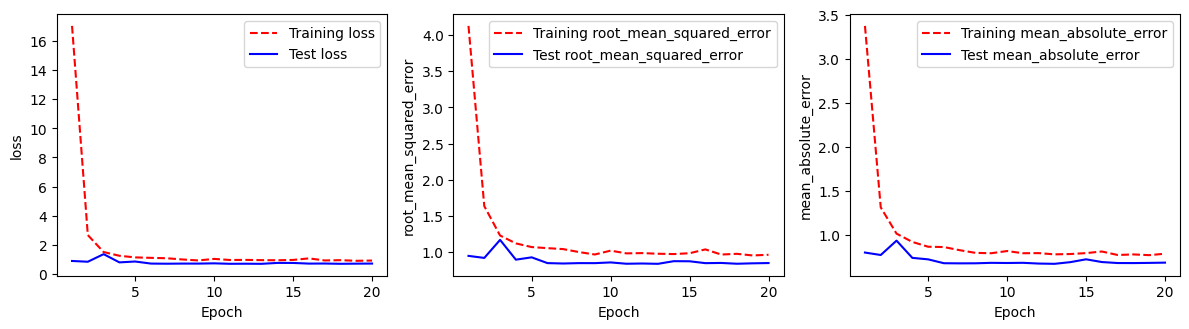

7/7 [==============================] - 0s 74ms/step


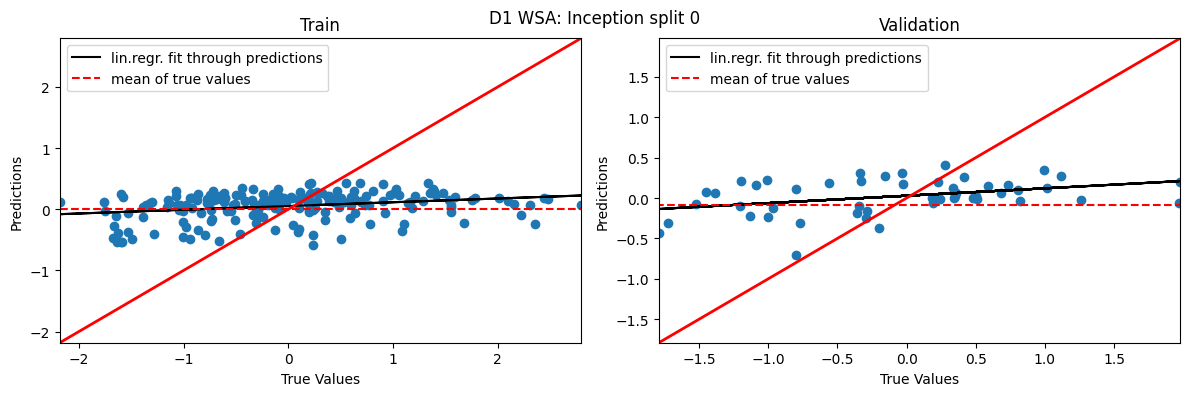

------------------------------------------------------------------
------------------------------Fold 1------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 8s 357ms/step - loss: 8.8685 - mean_absolute_error: 2.3548 - root_mean_squared_error: 2.9780 - val_loss: 1.6057 - val_mean_absolute_error: 1.0502 - val_root_mean_squared_error: 1.2671
Epoch 2/20
7/7 [==============================] - 1s 105ms/step - loss: 2.5578 - mean_absolute_error: 1.3453 - root_mean_squared_error: 1.5993 - val_loss: 2.8670 - val_mean_absolute_error: 1.3668 - val_root_mean_squared_error: 1.6932
Epoch 3/20
7/7 [==============================] - 1s 101ms/step - loss: 1.3695 - mean_absolute_error: 0.9059 - root_mean_squared_error: 1.1702 - val_loss: 1.4750 - val_mean_absolute_error: 0.9826 - val_root_mean_squared_error: 1.2145
Epoch 4/20
7/7 [==============================] - 1s 104ms/step - loss: 1.5186 - mean_absolute_er

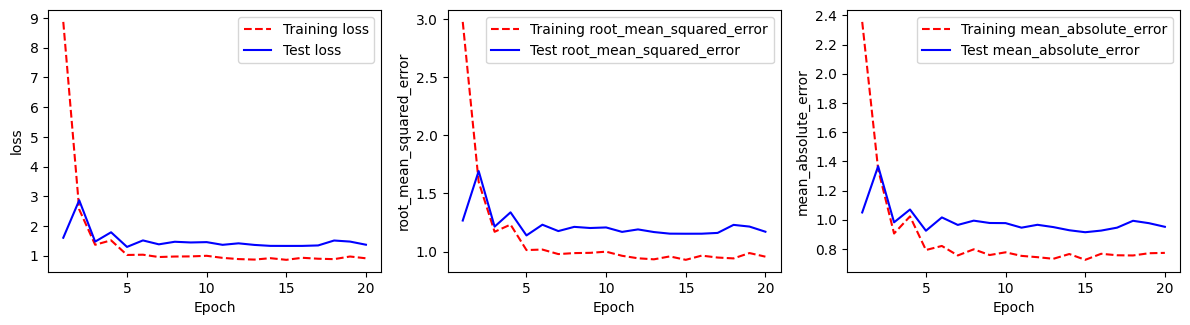

7/7 [==============================] - 0s 76ms/step


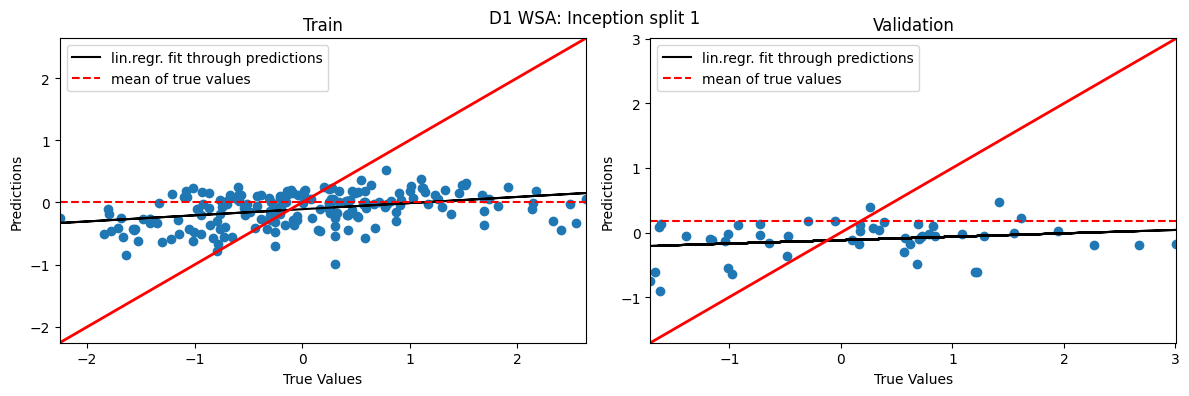

------------------------------------------------------------------
------------------------------Fold 2------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 13s 1s/step - loss: 18.6313 - mean_absolute_error: 3.5195 - root_mean_squared_error: 4.3164 - val_loss: 0.9290 - val_mean_absolute_error: 0.7932 - val_root_mean_squared_error: 0.9639
Epoch 2/20
7/7 [==============================] - 1s 104ms/step - loss: 2.9254 - mean_absolute_error: 1.4454 - root_mean_squared_error: 1.7104 - val_loss: 1.1797 - val_mean_absolute_error: 0.8828 - val_root_mean_squared_error: 1.0862
Epoch 3/20
7/7 [==============================] - 1s 104ms/step - loss: 1.8214 - mean_absolute_error: 1.0699 - root_mean_squared_error: 1.3496 - val_loss: 1.1093 - val_mean_absolute_error: 0.8339 - val_root_mean_squared_error: 1.0532
Epoch 4/20
7/7 [==============================] - 1s 107ms/step - loss: 1.1771 - mean_absolute_err

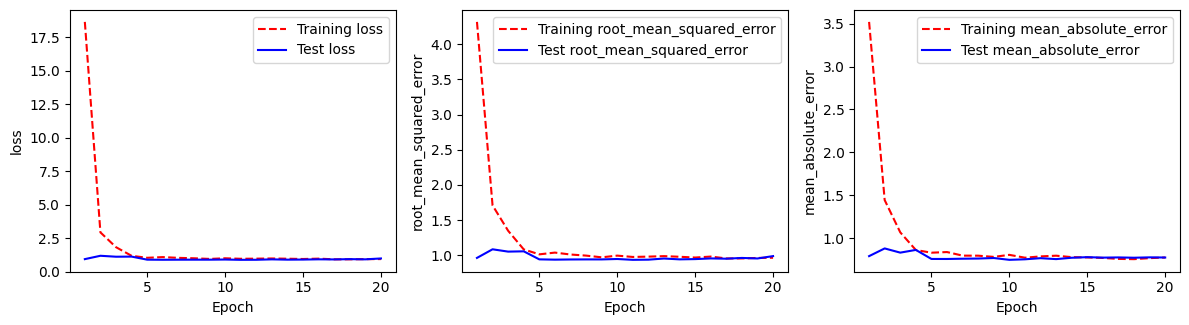

7/7 [==============================] - 1s 81ms/step


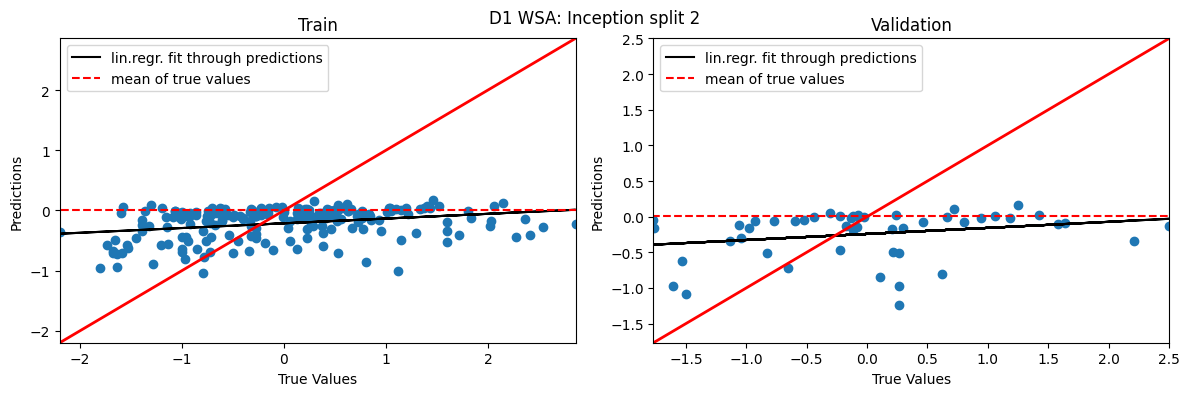

------------------------------------------------------------------
------------------------------Fold 3------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 8s 430ms/step - loss: 23.1792 - mean_absolute_error: 3.9786 - root_mean_squared_error: 4.8145 - val_loss: 4.9019 - val_mean_absolute_error: 2.0198 - val_root_mean_squared_error: 2.2140
Epoch 2/20
7/7 [==============================] - 1s 115ms/step - loss: 2.1867 - mean_absolute_error: 1.1969 - root_mean_squared_error: 1.4788 - val_loss: 1.9285 - val_mean_absolute_error: 1.0126 - val_root_mean_squared_error: 1.3887
Epoch 3/20
7/7 [==============================] - 1s 114ms/step - loss: 1.6496 - mean_absolute_error: 1.0554 - root_mean_squared_error: 1.2844 - val_loss: 1.5216 - val_mean_absolute_error: 1.1088 - val_root_mean_squared_error: 1.2335
Epoch 4/20
7/7 [==============================] - 1s 108ms/step - loss: 1.1280 - mean_absolute_e

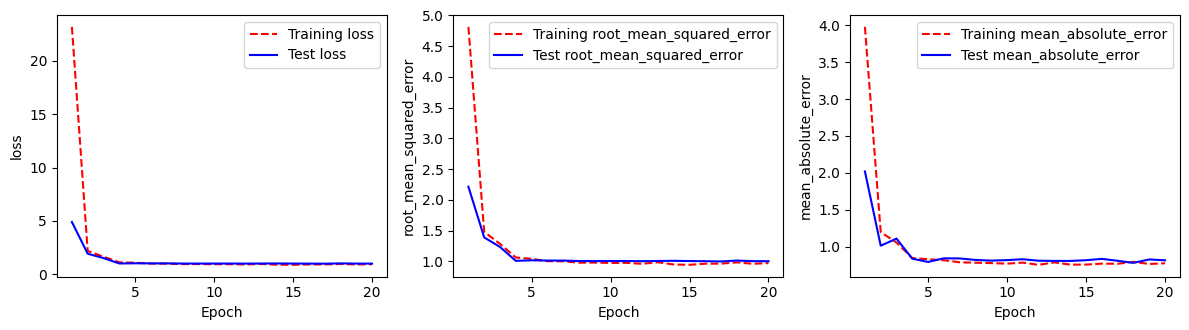

7/7 [==============================] - 1s 90ms/step


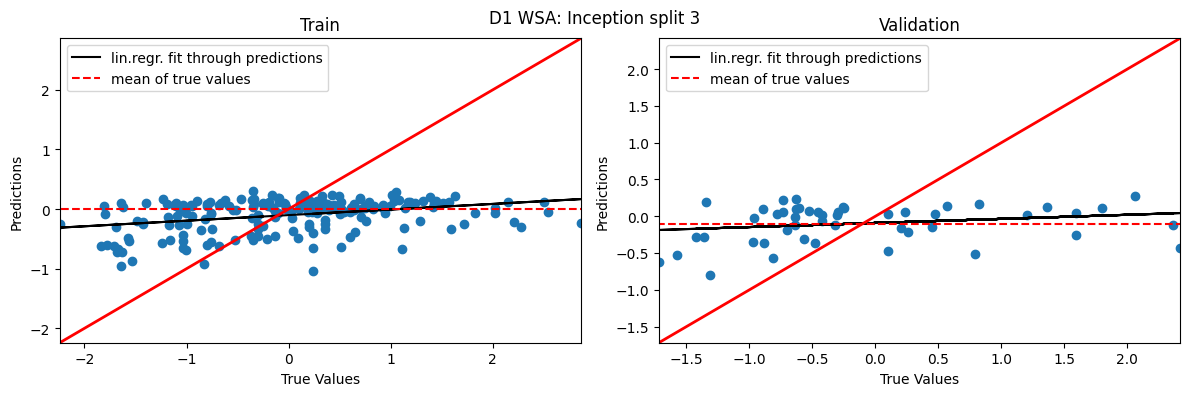

------------------------------------------------------------------
------------------------------Fold 4------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 9s 331ms/step - loss: 14.3994 - mean_absolute_error: 3.0654 - root_mean_squared_error: 3.7947 - val_loss: 0.8522 - val_mean_absolute_error: 0.7196 - val_root_mean_squared_error: 0.9232
Epoch 2/20
7/7 [==============================] - 1s 109ms/step - loss: 1.7745 - mean_absolute_error: 1.1035 - root_mean_squared_error: 1.3321 - val_loss: 0.8445 - val_mean_absolute_error: 0.7155 - val_root_mean_squared_error: 0.9190
Epoch 3/20
7/7 [==============================] - 1s 108ms/step - loss: 1.3443 - mean_absolute_error: 0.9072 - root_mean_squared_error: 1.1594 - val_loss: 0.8376 - val_mean_absolute_error: 0.7276 - val_root_mean_squared_error: 0.9152
Epoch 4/20
7/7 [==============================] - 1s 106ms/step - loss: 1.3195 - mean_absolute_e

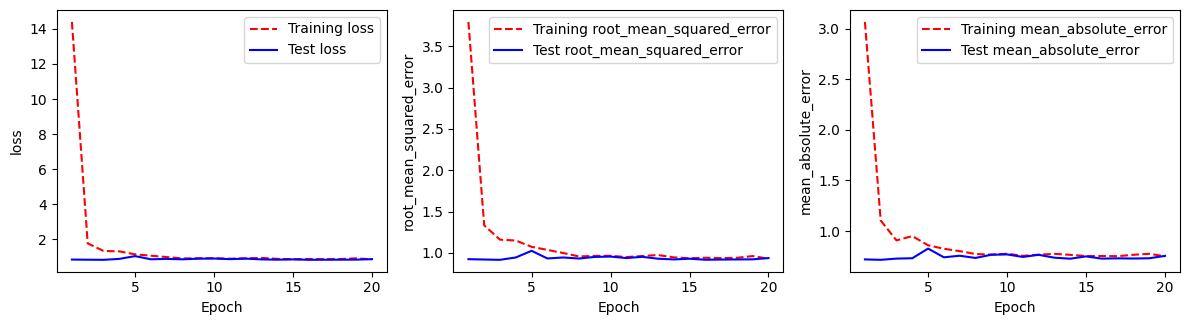

7/7 [==============================] - 1s 80ms/step


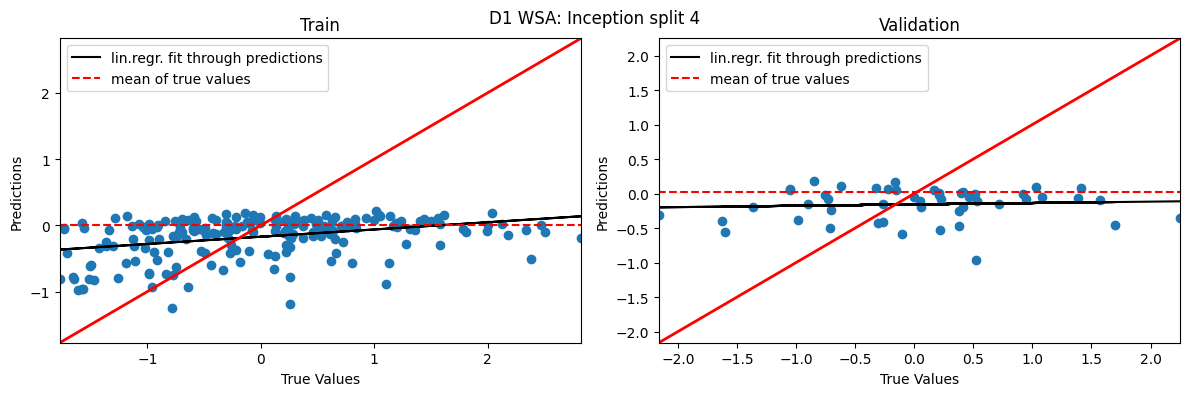

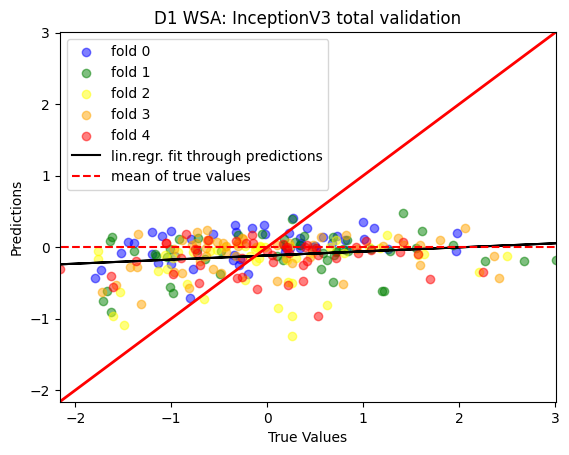

In [11]:
all_val_preds = []
all_val_true = []
for i,(train_idx,test_idx) in enumerate(kf.split(X_col)):
  print('-'*66)
  print('-'*30+f'Fold {i}'+'-'*30)
  print('-'*66)

  X_train = np.take(X_col, train_idx, axis=0)
  y_train = np.take(y, train_idx, axis=0)

  X_val = np.take(X_col, test_idx, axis=0)
  y_val = np.take(y, test_idx, axis=0)

  y_train,y_val = scale_fit_transform(y_train,y_val)

  model = build_inception((256,256,3),512,0.3,0.001)
  h = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val,y_val))
  plot_metrics(h,['loss','root_mean_squared_error','mean_absolute_error'],f'D1 WSA: InceptionV3 split{i}')

  y_val_pred = model.predict(X_val)
  y_train_pred = model.predict(X_train)
  all_val_preds.append(y_val_pred)
  all_val_true.append(y_val)

  plot_predictions(y_val.reshape(-1, 1),y_val_pred,y_train.reshape(-1, 1),y_train_pred,f'D1 WSA: Inception split {i}')

plot_all_validation(all_val_true,all_val_preds,'D1 WSA: InceptionV3 total validation')

In [12]:
print('Total validation RMSE:', mean_squared_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel(),squared=False))

Total validation RMSE: 0.9950804156850587


In [13]:
print('Total validation MAE:', mean_absolute_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel()))

Total validation MAE: 0.7966715192573912


#DenseNet

------------------------------------------------------------------
------------------------------Fold 0------------------------------
------------------------------------------------------------------
51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/20
7/7 [==============================] - 30s 2s/step - loss: 635.9623 - mean_absolute_error: 21.1233 - root_mean_squared_error: 25.2183 - val_loss: 0.7091 - val_mean_absolute_error: 0.6637 - val_root_mean_squared_error: 0.8421
Epoch 2/20
7/7 [==============================] - 1s 161ms/step - loss: 69.3303 - mean_absolute_error: 7.4337 - root_mean_squared_error: 8.3265 - val_loss: 5.3058 - val_mean_absolute_error: 2.1496 - val_root_mean_squared_error: 2.3034
Epoch 3/20
7/7 [==============================] - 1s 160ms/step - loss: 23.9745 - mean_absolute_error: 4.5077 - root_mean_squared_error: 4.8964 - val_loss: 1.0325 - val_mean_absolute_error: 0.8021 - val_root_mean_squared_error: 1.0161
Epoch 4/20
7/7 [============

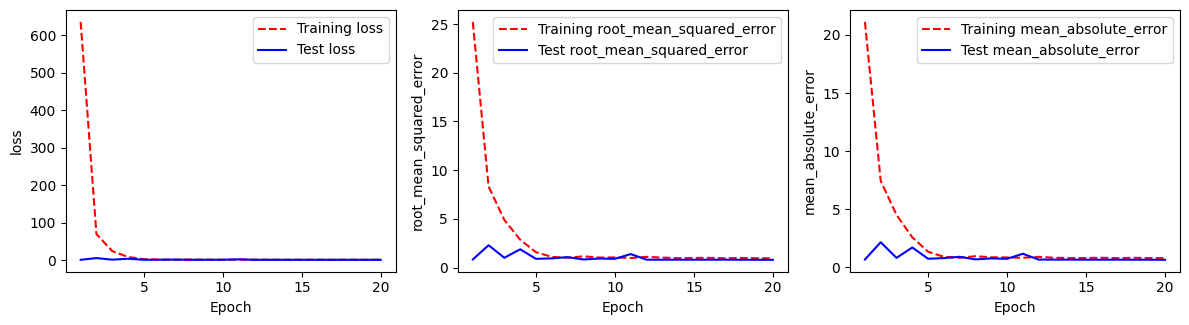

7/7 [==============================] - 1s 125ms/step


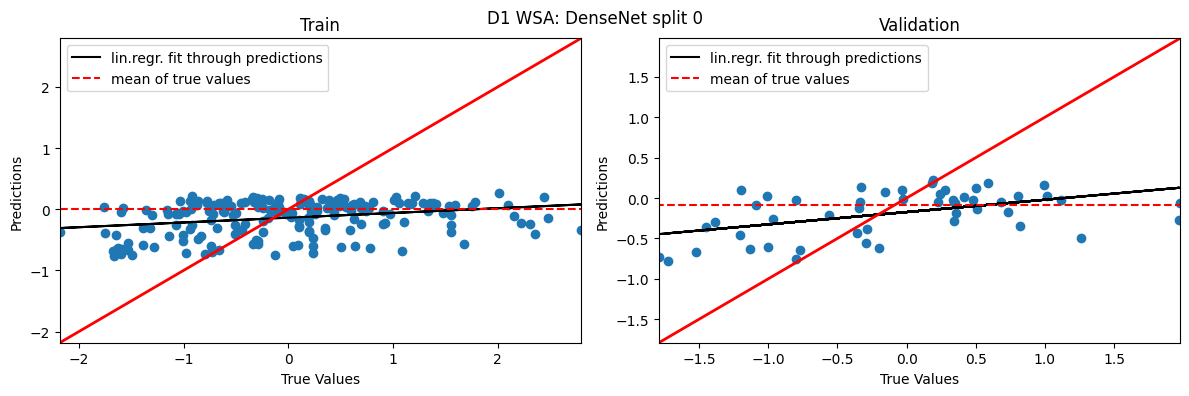

------------------------------------------------------------------
------------------------------Fold 1------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 16s 715ms/step - loss: 817.1640 - mean_absolute_error: 20.0320 - root_mean_squared_error: 28.5861 - val_loss: 25.5056 - val_mean_absolute_error: 4.8994 - val_root_mean_squared_error: 5.0503
Epoch 2/20
7/7 [==============================] - 1s 159ms/step - loss: 13.4975 - mean_absolute_error: 3.3074 - root_mean_squared_error: 3.6739 - val_loss: 1.6070 - val_mean_absolute_error: 1.0118 - val_root_mean_squared_error: 1.2677
Epoch 3/20
7/7 [==============================] - 1s 177ms/step - loss: 4.5184 - mean_absolute_error: 1.7570 - root_mean_squared_error: 2.1257 - val_loss: 2.2303 - val_mean_absolute_error: 1.2318 - val_root_mean_squared_error: 1.4934
Epoch 4/20
7/7 [==============================] - 1s 174ms/step - loss: 2.7132 - mean_abso

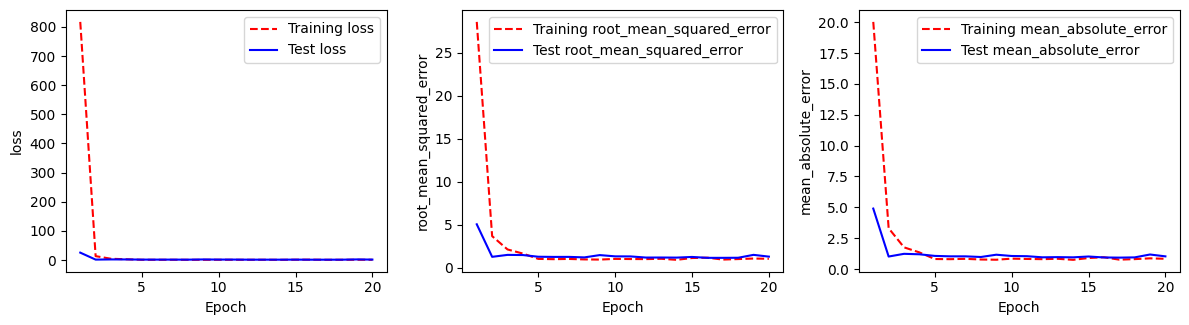

7/7 [==============================] - 1s 125ms/step


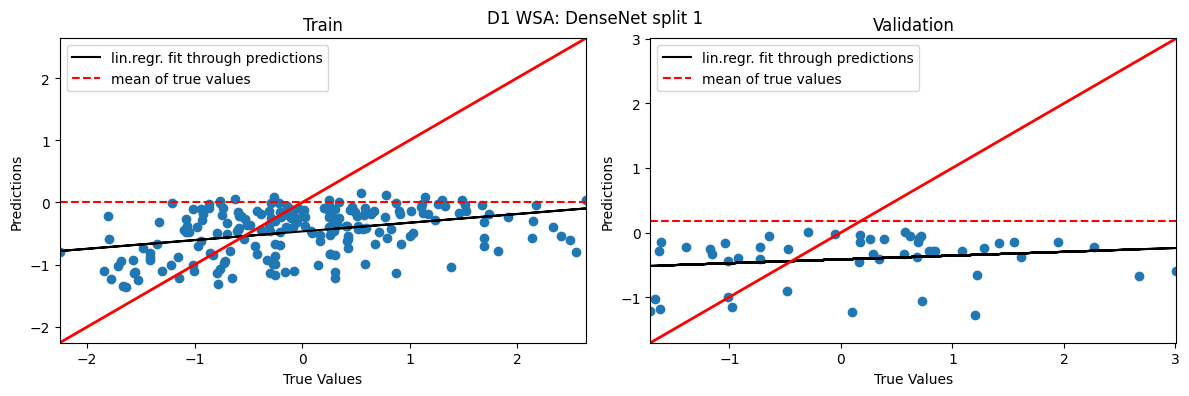

------------------------------------------------------------------
------------------------------Fold 2------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 24s 2s/step - loss: 857.3618 - mean_absolute_error: 21.2432 - root_mean_squared_error: 29.2807 - val_loss: 50.6851 - val_mean_absolute_error: 7.0451 - val_root_mean_squared_error: 7.1193
Epoch 2/20
7/7 [==============================] - 1s 181ms/step - loss: 36.5785 - mean_absolute_error: 5.5111 - root_mean_squared_error: 6.0480 - val_loss: 17.9660 - val_mean_absolute_error: 4.1184 - val_root_mean_squared_error: 4.2386
Epoch 3/20
7/7 [==============================] - 1s 174ms/step - loss: 12.0085 - mean_absolute_error: 3.0748 - root_mean_squared_error: 3.4653 - val_loss: 2.8237 - val_mean_absolute_error: 1.4547 - val_root_mean_squared_error: 1.6804
Epoch 4/20
7/7 [==============================] - 1s 174ms/step - loss: 3.1956 - mean_absol

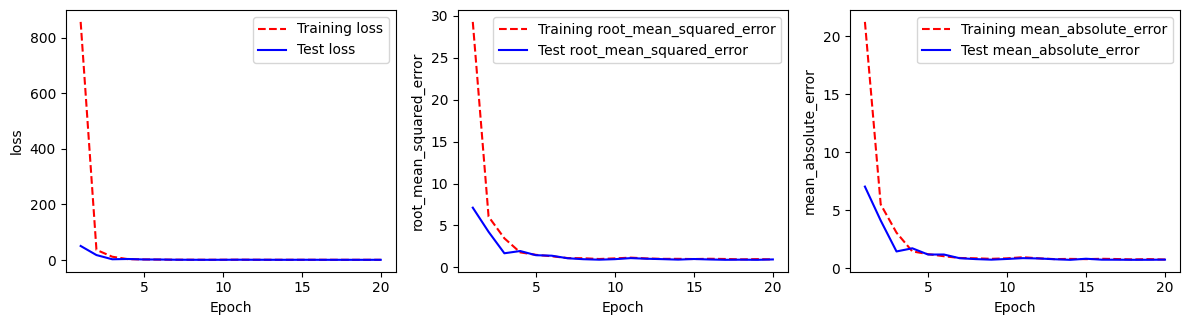

7/7 [==============================] - 1s 124ms/step


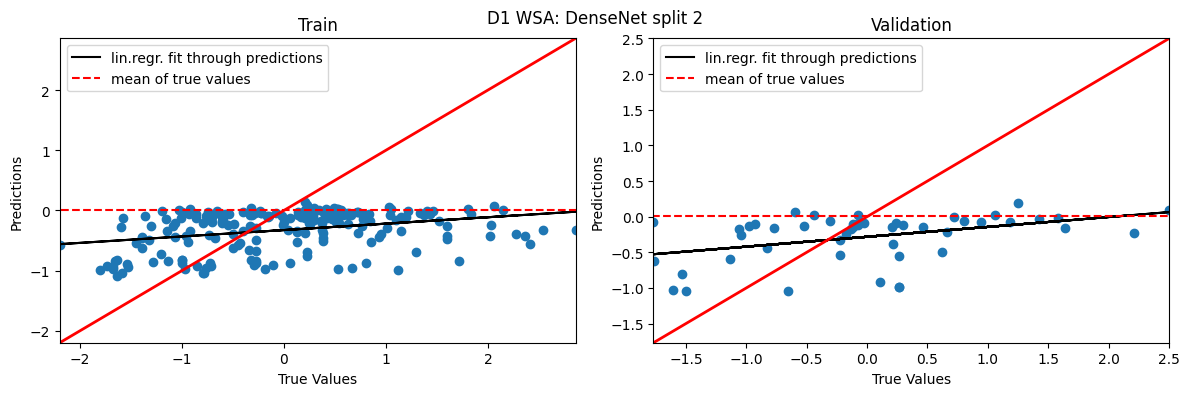

------------------------------------------------------------------
------------------------------Fold 3------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 17s 768ms/step - loss: 1136.8966 - mean_absolute_error: 19.5193 - root_mean_squared_error: 33.7179 - val_loss: 10.7507 - val_mean_absolute_error: 3.1092 - val_root_mean_squared_error: 3.2788
Epoch 2/20
7/7 [==============================] - 1s 160ms/step - loss: 6.5060 - mean_absolute_error: 2.1929 - root_mean_squared_error: 2.5507 - val_loss: 3.7884 - val_mean_absolute_error: 1.6505 - val_root_mean_squared_error: 1.9464
Epoch 3/20
7/7 [==============================] - 1s 159ms/step - loss: 1.9730 - mean_absolute_error: 1.1535 - root_mean_squared_error: 1.4047 - val_loss: 1.1638 - val_mean_absolute_error: 0.7812 - val_root_mean_squared_error: 1.0788
Epoch 4/20
7/7 [==============================] - 1s 159ms/step - loss: 1.1750 - mean_abso

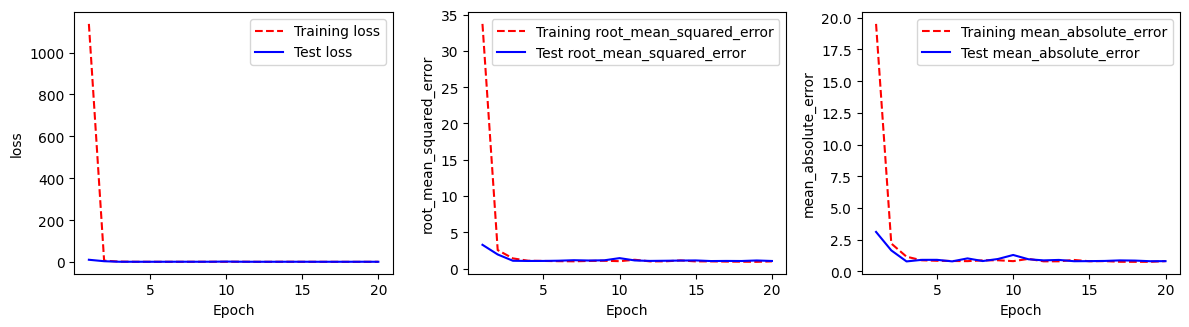

7/7 [==============================] - 1s 125ms/step


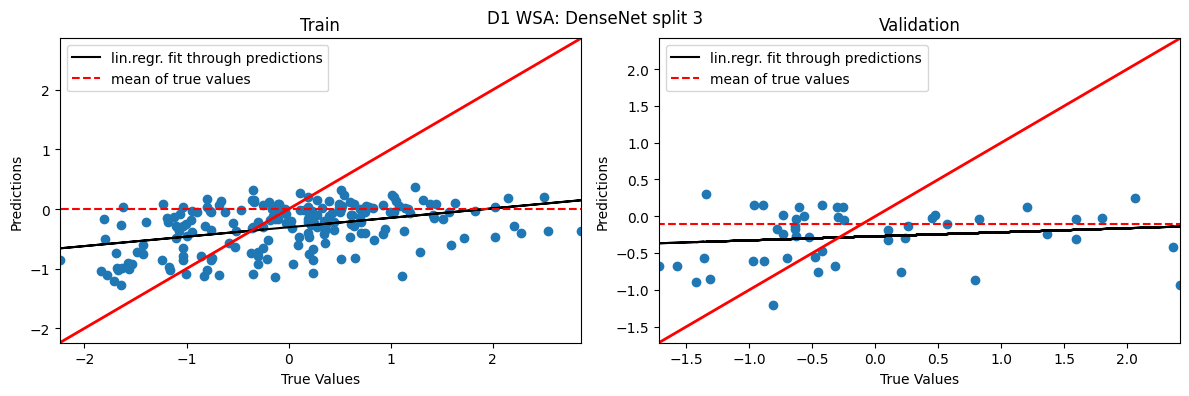

------------------------------------------------------------------
------------------------------Fold 4------------------------------
------------------------------------------------------------------
Epoch 1/20
7/7 [==============================] - 17s 753ms/step - loss: 773.5618 - mean_absolute_error: 16.0979 - root_mean_squared_error: 27.8130 - val_loss: 5.0969 - val_mean_absolute_error: 2.0745 - val_root_mean_squared_error: 2.2576
Epoch 2/20
7/7 [==============================] - 1s 162ms/step - loss: 4.5733 - mean_absolute_error: 1.7987 - root_mean_squared_error: 2.1385 - val_loss: 4.0345 - val_mean_absolute_error: 1.8119 - val_root_mean_squared_error: 2.0086
Epoch 3/20
7/7 [==============================] - 1s 162ms/step - loss: 2.3941 - mean_absolute_error: 1.2501 - root_mean_squared_error: 1.5473 - val_loss: 1.0557 - val_mean_absolute_error: 0.8404 - val_root_mean_squared_error: 1.0275
Epoch 4/20
7/7 [==============================] - 1s 162ms/step - loss: 1.1920 - mean_absolu

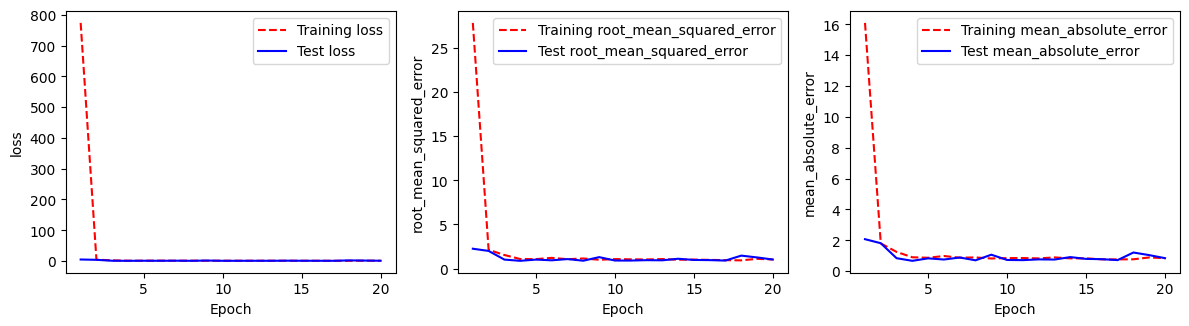

7/7 [==============================] - 1s 126ms/step


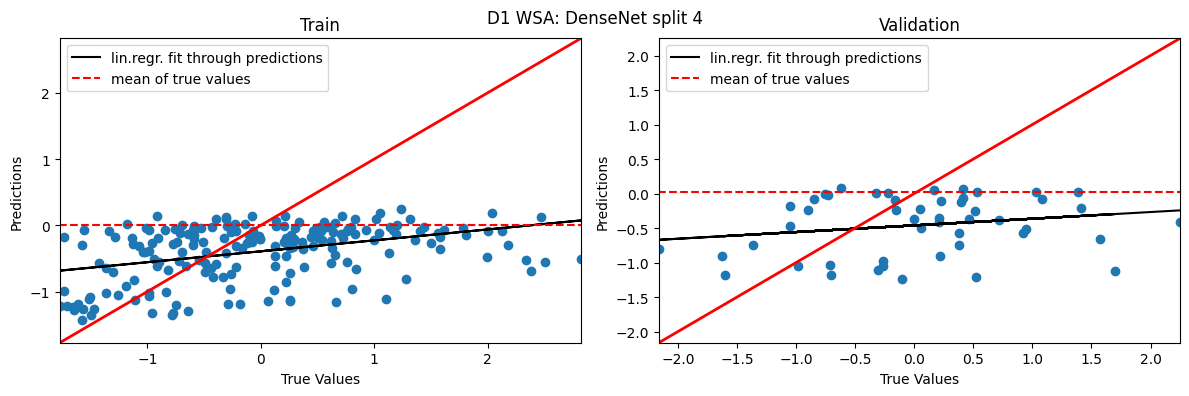

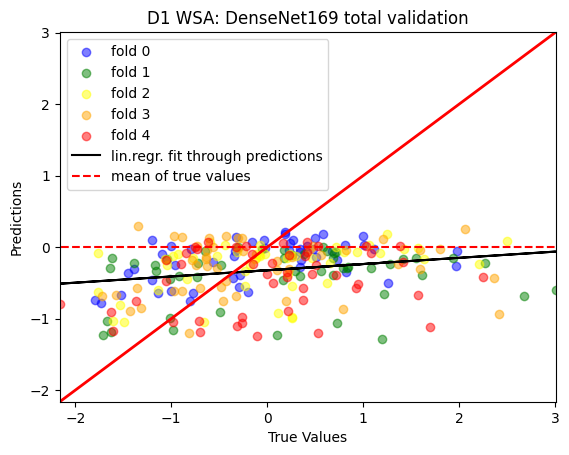

In [14]:
all_val_preds = []
all_val_true = []

for i,(train_idx,test_idx) in enumerate(kf.split(X_col)):
  print('-'*66)
  print('-'*30+f'Fold {i}'+'-'*30)
  print('-'*66)

  X_train = np.take(X_col, train_idx, axis=0)
  y_train = np.take(y, train_idx, axis=0)

  X_val = np.take(X_col, test_idx, axis=0)
  y_val = np.take(y, test_idx, axis=0)
  y_train,y_val = scale_fit_transform(y_train,y_val)

  model = build_densenet((256,256,3),512,0,0.01)
  h = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val,y_val))
  plot_metrics(h,['loss','root_mean_squared_error','mean_absolute_error'],f'D1 WSA: DenseNet169 split{i}')


  y_val_pred = model.predict(X_val)
  y_train_pred = model.predict(X_train)
  all_val_preds.append(y_val_pred)
  all_val_true.append(y_val)


  plot_predictions(y_val.reshape(-1, 1),y_val_pred,y_train.reshape(-1, 1),y_train_pred,f'D1 WSA: DenseNet split {i}')

plot_all_validation(all_val_true,all_val_preds,'D1 WSA: DenseNet169 total validation')

In [15]:
print('Total validation RMSE:', mean_squared_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel(),squared=False))

Total validation RMSE: 1.0382271617384085


In [16]:
print('Total validation MAE:', mean_absolute_error(np.concatenate(all_val_true).ravel(),np.concatenate(all_val_preds).ravel()))

Total validation MAE: 0.8116339194551307
